# HW Week07
## Try to do clustering for the given data set.
**Case 1\.** use modularity to run clustering by the geodesic distance.  
**Case 2\.** use modularity to run clustering by the Euclidean distance.  
**Case 3\.** use k-mean to run clustering again according to the result of **Case 1.**  
**Case 4\.** use k-mean to run clustering again according to the result of **Case 2.**  
![Week07-HW.bmp](./Week07-HW.bmp "Week07-HW")

***

### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import pandas as pd
import community
import networkx as nx
from sklearn.cluster import KMeans

### Raw data visualization

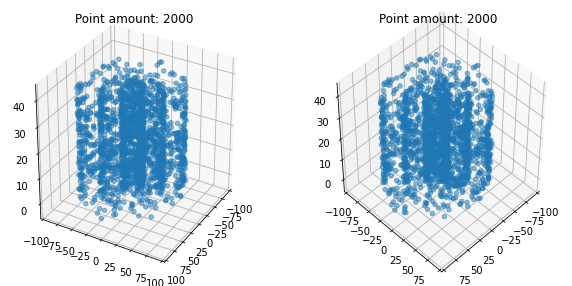

In [2]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1, projection='3d')
data = np.loadtxt('XYZ.csv', delimiter=',')
ax1.scatter(data[:, 0], data[:, 1], data[:, 2], alpha = 0.5)
plt.xlim((-100, 100))
plt.ylim((-100, 100))
ax1.set_zlim(-5, 45)
plt.title('Point amount: ' + str(len(data)))
ax1.view_init(30, 30)

ax2 = fig.add_subplot(1,2,2, projection='3d')
data = np.loadtxt('XYZ.csv', delimiter=',')
ax2.scatter(data[:, 0], data[:, 1], data[:, 2], alpha = 0.5)
plt.xlim((-100, 100))
plt.ylim((-100, 100))
ax2.set_zlim(-5, 45)
plt.title('Point amount: ' + str(len(data)))
ax2.view_init(45, 45)

plt.show()

***

### Case 1. use modularity to run clustering by the geodesic distance.

In [3]:
# Read edge file
XYZ_Edges = pd.read_csv('./Edges.csv')
print(f'Edge amount: {len(XYZ_Edges)}')

# Prepare edge data
point2edge = np.array(XYZ_Edges.iloc[:, 0:3].values)
XYZ_Edges

Edge amount: 6036


,Source,Target,Weight,Type
0,1,5,1.253704,Undirected
1,1,14,1.277093,Undirected
2,1,16,0.345464,Undirected
3,1,17,0.288327,Undirected
4,1,19,0.249381,Undirected
...,...,...,...,...
6031,1995,2000,0.104098,Undirected
6032,1996,1997,0.213520,Undirected
6033,1997,1999,0.154084,Undirected
6034,1997,2000,0.140709,Undirected


In [4]:
# Create graph
G = nx.Graph()
for i in range(0, len(point2edge)):
    # vertex_start, vertex_end, weight(geodesic distance)
    e = (str(int(point2edge[i,0])), str(int(point2edge[i,1])), point2edge[i,2])
    G.add_weighted_edges_from([(e)])

In [5]:
# Calculate modularity
m_table = pd.DataFrame()
m_partition = pd.DataFrame()

# Test five times to find max
for i in range(5): 
    partition = community.best_partition(G)
    size = float(len(set(partition.values())))
    mod = community.modularity(partition,G)
    d = {'partition': [size], 'modularity': [mod]}
    m_df = pd.DataFrame(data = d)
    m_table = m_table.append(m_df)
    m_df2 = pd.DataFrame(partition.values())
    m_partition = m_partition.append(m_df2.T)

# Choose max partition-modularity set
m_table = m_table.reset_index(drop=True)
print(m_table)
max_mod = m_table[m_table['modularity'] == m_table['modularity'].max()]
print(f'\n{max_mod}')
max_mod_num = max_mod.index.values.astype(int)
m_partition = m_partition.reset_index(drop=True)
m_partition = m_partition.iloc[int(max_mod_num):int(max_mod_num+1), :]

# geodesic distance partition number
gd_num = max_mod['partition'].astype(int)
gd_num = int(gd_num)

   partition  modularity
0       43.0    0.937285
1       42.0    0.936989
2       44.0    0.936862
3       45.0    0.937250
4       43.0    0.936894

   partition  modularity
0       43.0    0.937285


In [6]:
# Assign node color based on community in network with max partition-modularity set
for com in set(m_partition) :
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
values = [partition.get(node) for node in G.nodes()]

In [7]:
# Assign data point color based on community in realspace with max partition-modularity set
label = np.zeros((len(data),1))
for j in set(partition.values()) :
    for i in range(len(data)) :
        if partition[str(i+1)] == j :            
            label[i] =  j
labelRE = np.reshape(label, len(data))

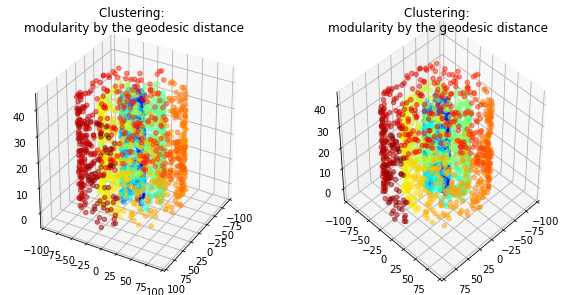

In [8]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1, projection='3d')
data = np.loadtxt('XYZ.csv', delimiter=',')
x = data[:,0]; y = data[:,1]; z = data[:,2]; c = labelRE
ax1.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'), alpha = 0.5)
plt.xlim((-100, 100))
plt.ylim((-100, 100))
ax1.set_zlim(-5, 45)
plt.title('Clustering: \nmodularity by the geodesic distance')
ax1.view_init(30, 30)

ax2 = fig.add_subplot(1,2,2, projection='3d')
data = np.loadtxt('XYZ.csv', delimiter=',')
x = data[:,0]; y = data[:,1]; z = data[:,2]; c = labelRE
ax2.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'), alpha = 0.5)
plt.xlim((-100, 100))
plt.ylim((-100, 100))
ax2.set_zlim(-5, 45)
plt.title('Clustering: \nmodularity by the geodesic distance')
ax2.view_init(45, 45)

plt.show()

***

### Case 2. use modularity to run clustering by the Euclidean distance.

In [9]:
# Load point
xyz_df = pd.DataFrame(data=data, columns=['x', 'y', 'z'])
p_id = np.arange(1,2001,1)
xyz_df.insert(0, 'point_id', p_id, True)

```python
# Calculate weight by Euclidean distance
ed_deges = np.array([0, 0, 0])
for i in range(len(xyz_df)):
    for j in range(len(xyz_df)):
        e_d = ((data[i,0]-data[j,0])**2 + (data[i,1]-data[j,1])**2 + (data[i,2]-data[j,2])**2)**0.5
        if i != j:
            tmp = np.array([(i+1), (j+1), (e_d)])
            ed_deges = np.vstack((ed_deges, tmp))

ed_deges_df = pd.DataFrame(ed_deges, columns=['Source', 'Target', 'Weight']) 
ed_deges_df = ed_deges_df.iloc[1:,:]
ed_deges_df = ed_deges_df.astype({'Source': int, 'Target': int})
ed_deges_df.insert(3, 'Type', 'Undirected')
ed_deges_df

ed_deges_df.to_csv('ed_edge.csv', index=0)
```

In [10]:
# Read edge file
XYZ_Edges = pd.read_csv('./ed_edge.csv')
print(f'Edge amount: {len(XYZ_Edges)}')

# Re-calculate weight
XYZ_Edges['Weight'] = 1/XYZ_Edges['Weight']

# Prepare edge data
point2edge = np.array(XYZ_Edges.iloc[:, 0:3].values)
XYZ_Edges

Edge amount: 3998000


,Source,Target,Weight,Type
0,1,2,0.038752,Undirected
1,1,3,0.049481,Undirected
2,1,4,0.089829,Undirected
3,1,5,1.253704,Undirected
4,1,6,0.052389,Undirected
...,...,...,...,...
3997995,2000,1995,0.104098,Undirected
3997996,2000,1996,0.094621,Undirected
3997997,2000,1997,0.140709,Undirected
3997998,2000,1998,0.047605,Undirected


In [11]:
# Create graph
G = nx.Graph()
for i in range(0, len(point2edge)):
    # vertex_start, vertex_end, weight(geodesic distance)
    e = (str(int(point2edge[i,0])), str(int(point2edge[i,1])), point2edge[i,2])
    G.add_weighted_edges_from([(e)])

In [12]:
# Calculate modularity
m_table = pd.DataFrame()
m_partition = pd.DataFrame()

# Test five times to find max
for i in range(5): 
    partition = community.best_partition(G)
    size = float(len(set(partition.values())))
    mod = community.modularity(partition,G)
    d = {'partition': [size], 'modularity': [mod]}
    m_df = pd.DataFrame(data = d)
    m_table = m_table.append(m_df)
    m_df2 = pd.DataFrame(partition.values())
    m_partition = m_partition.append(m_df2.T)

# Choose max partition-modularity set
m_table = m_table.reset_index(drop=True)
print(m_table)
max_mod = m_table[m_table['modularity'] == m_table['modularity'].max()]
print(f'\n{max_mod}')
max_mod_num = max_mod.index.values.astype(int)
m_partition = m_partition.reset_index(drop=True)
m_partition = m_partition.iloc[int(max_mod_num):int(max_mod_num+1), :]

# Euclidean distance partition number
ed_num = max_mod['partition'].astype(int)
ed_num = int(ed_num)

   partition  modularity
0        5.0    0.184732
1        4.0    0.183586
2        5.0    0.185330
3        4.0    0.186511
4        5.0    0.185434

   partition  modularity
3        4.0    0.186511


In [13]:
# Assign node color based on community in network with max partition-modularity set
for com in set(m_partition) :
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
values = [partition.get(node) for node in G.nodes()]

In [14]:
# Assign data point color based on community in realspace with max partition-modularity set
label = np.zeros((len(data),1))
for j in set(partition.values()) :
    for i in range(len(data)) :
        if partition[str(i+1)] == j :            
            label[i] =  j
labelRE = np.reshape(label, len(data))

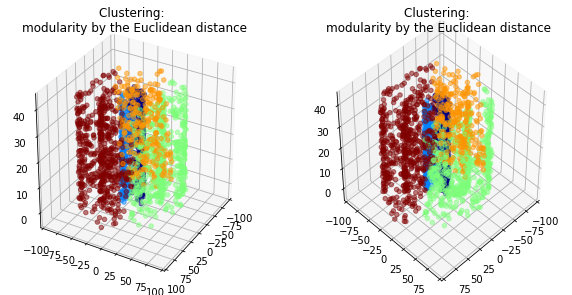

In [15]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1, projection='3d')
data = np.loadtxt('XYZ.csv', delimiter=',')
x = data[:,0]; y = data[:,1]; z = data[:,2]; c = labelRE
ax1.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'), alpha = 0.5)
plt.xlim((-100, 100))
plt.ylim((-100, 100))
ax1.set_zlim(-5, 45)
plt.title('Clustering: \nmodularity by the Euclidean distance')
ax1.view_init(30, 30)

ax2 = fig.add_subplot(1,2,2, projection='3d')
data = np.loadtxt('XYZ.csv', delimiter=',')
x = data[:,0]; y = data[:,1]; z = data[:,2]; c = labelRE
ax2.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'), alpha = 0.5)
plt.xlim((-100, 100))
plt.ylim((-100, 100))
ax2.set_zlim(-5, 45)
plt.title('Clustering: \nmodularity by the Euclidean distance')
ax2.view_init(45, 45)

plt.show()

***

### Case 3. use k-mean to run clustering again according to the result of Case 1.

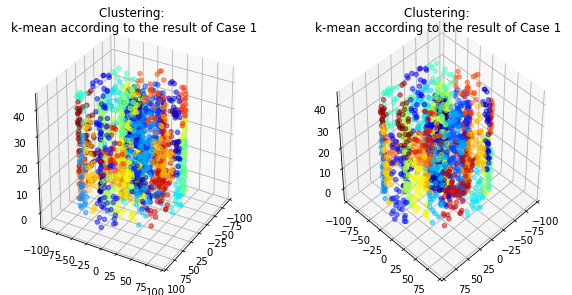

In [16]:
# Clustering amount == partition amount in Case 1.

# Clustering
k_means_gd_est = KMeans(n_clusters=gd_num, random_state=404).fit(data)
labels = k_means_gd_est.labels_

# Plotting
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1, projection='3d')
data = np.loadtxt('XYZ.csv', delimiter=',')
x = data[:,0]; y = data[:,1]; z = data[:,2]
ax1.scatter(x, y, z, c = labels.astype(np.float), cmap = plt.get_cmap('jet'), alpha = 0.5)
plt.xlim((-100, 100))
plt.ylim((-100, 100))
ax1.set_zlim(-5, 45)
plt.title('Clustering: \nk-mean according to the result of Case 1')
ax1.view_init(30, 30)

ax2 = fig.add_subplot(1,2,2, projection='3d')
data = np.loadtxt('XYZ.csv', delimiter=',')
x = data[:,0]; y = data[:,1]; z = data[:,2]; c = labelRE
ax2.scatter(x, y, z, c = labels.astype(np.float), cmap = plt.get_cmap('jet'), alpha = 0.5)
plt.xlim((-100, 100))
plt.ylim((-100, 100))
ax2.set_zlim(-5, 45)
plt.title('Clustering: \nk-mean according to the result of Case 1')
ax2.view_init(45, 45)

plt.show()

***

### Case 4. use k-mean to run clustering again according to the result of Case 2.

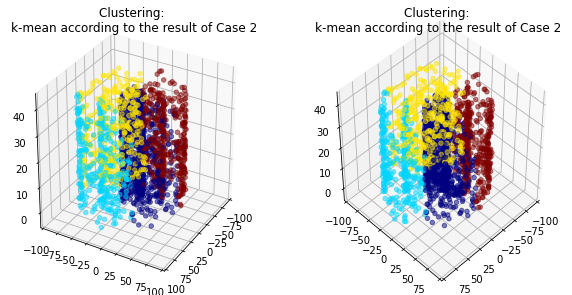

In [17]:
# Clustering amount == partition amount in Case 2.

# Clustering
k_means_gd_est = KMeans(n_clusters=ed_num, random_state=404).fit(data)
labels = k_means_gd_est.labels_

# Plotting
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1, projection='3d')
data = np.loadtxt('XYZ.csv', delimiter=',')
x = data[:,0]; y = data[:,1]; z = data[:,2]
ax1.scatter(x, y, z, c = labels.astype(np.float), cmap = plt.get_cmap('jet'), alpha = 0.5)
plt.xlim((-100, 100))
plt.ylim((-100, 100))
ax1.set_zlim(-5, 45)
plt.title('Clustering: \nk-mean according to the result of Case 2')
ax1.view_init(30, 30)

ax2 = fig.add_subplot(1,2,2, projection='3d')
data = np.loadtxt('XYZ.csv', delimiter=',')
x = data[:,0]; y = data[:,1]; z = data[:,2]; c = labelRE
ax2.scatter(x, y, z, c = labels.astype(np.float), cmap = plt.get_cmap('jet'), alpha = 0.5)
plt.xlim((-100, 100))
plt.ylim((-100, 100))
ax2.set_zlim(-5, 45)
plt.title('Clustering: \nk-mean according to the result of Case 2')
ax2.view_init(45, 45)

plt.show()